#Multiclass Classification

In this notebook we will demonstrate different types of multiclass classifications and analyze each of them.

In [ ]:
#@title Setup Environment
import sklearn
import pandas as pd
import io
import os
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from google.colab import drive
from tqdm.notebook import trange, tqdm
from IPython.display import clear_output

## Loading the Dataset

Now we will load orders dataset from personal google drive. So we must mount the drive and load the dataset from appropriate path.

In [ ]:
#@title Connect to Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/Ubaar/orders_data.csv'
orders_data = pd.read_csv(file_path)
print("Orders Dataset Shape: ", orders_data.shape)

Orders Dataset Shape:  (44052, 30)


## Getting Some Insights from Our Data

Since a good visualization helps a lot in making sense of our data, we will draw some charts to get better insight about the Ubaar orders dataset. Also we will take a brief look at the dataset

In [ ]:
orders_data.head(10)

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Who Added Role,Driver Income,Weight,...,Destination Lat,Destination Lng,Dispatch Time Delta,Pickup Date Time Delta,Order Channel,Packaging Type,Creation Datetime,Unload Option,Has Comments,Load Status
0,بار صنعتی,یزد,بندرعباس,یزد,هرمزگان,یزد,بندرعباس,anonymous,0.0,24.0,...,27.183222,56.266646,23.928889,NaN,NaN,hichkodam,2019-11-05 06:46:15.847289+00:00,NaN,0,reject_price
1,بار صنعتی,قزوین,رودسر,قزوین,گیلان,قزوین,چابکسر,anonymous,0.0,5.0,...,36.980067,50.531772,23.970278,NaN,NaN,hichkodam,2019-11-05 20:01:46.763769+00:00,NaN,0,reject_price
2,بار صنعتی,تهران,همدان,تهران,همدان,تهران,همدان,anonymous,0.0,2.0,...,34.798857,48.515023,23.962778,NaN,NaN,hichkodam,2019-11-06 09:13:13.686217+00:00,NaN,0,reject_price
3,بار صنعتی,آمل,گرگان,مازندران,گلستان,آمل,گرگان,anonymous,0.0,15.0,...,36.845643,54.439336,23.974722,NaN,NaN,hichkodam,2019-10-31 09:52:30.930302+00:00,NaN,0,reject_price
4,گلدان پلاستیکی,هشتگرد,اردبیل,البرز,اردبیل,پل کردان,اردبیل,baarbari,0.0,2.0,...,38.256645,48.317509,16.749444,68.358889,web,karton,2019-11-20 13:45:01.859383+00:00,day,0,delivered
5,بار صنعتی,کازرون,تهران,فارس,تهران,قیروکازین,تهران,anonymous,0.0,5.0,...,35.688905,51.388435,23.968056,NaN,NaN,hichkodam,2019-10-31 04:34:54.206605+00:00,NaN,0,reject_price
6,بار صنعتی,خوانسار,دیلم,اصفهان,بوشهر,خوانسار,بندر دیلم,anonymous,0.0,10.0,...,30.058981,50.167812,23.978889,NaN,NaN,hichkodam,2019-11-02 19:46:15.870573+00:00,NaN,0,reject_price
7,بار صنعتی,اصفهان,گنبد کاووس,اصفهان,گلستان,اصفهان,گنبد کاووس,anonymous,0.0,5.0,...,37.238322,55.167322,23.943889,NaN,NaN,hichkodam,2019-11-03 05:16:21.270880+00:00,NaN,0,reject_price
8,انواع رنگ ومواد پاك کننده,اشتهارد,مشهد,البرز,خراسان رضوی,شهرک صنعتی اشتهارد,مشهد,baarbari,1100000.0,4.0,...,36.272622,59.600624,0.403056,NaN,android,falleh,2019-10-15 07:35:48.686186+00:00,day,0,cancelled
9,انواع سموم وکودشیمیایی,تهران,اراک,تهران,مرکزی,تهران,اراک,user,744000.0,15.0,...,34.095355,49.701349,39.288611,NaN,android,kiseh_gooni,2019-10-24 13:12:40.461622+00:00,day,1,cancelled


In [ ]:
orders_data.describe()

,Driver Income,Weight,Distance,Duration,Transport Cost,Source Lat,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Pickup Date Time Delta,Has Comments
count,4.405200e+04,44052.000000,44052.000000,44052.000000,4.405200e+04,44052.000000,44052.000000,44052.000000,44052.000000,44052.000000,2808.000000,44052.000000
mean,3.677479e+11,7.860764,486.471045,5.681138,3.677479e+11,34.751266,51.545719,34.018325,51.926935,28.755725,27.093312,0.362458
std,7.718487e+13,7.912958,440.643799,4.893344,7.718487e+13,2.201000,2.750519,3.039853,3.837871,59.757645,22.847216,0.480716
min,0.000000e+00,0.020000,0.000000,0.000000,0.000000e+00,24.494214,28.953026,24.494214,28.953026,-4.676944,0.006667,0.000000
25%,0.000000e+00,2.000000,50.000000,1.000000,0.000000e+00,33.640419,50.681933,32.198349,49.587414,3.048333,17.518611,0.000000
50%,1.800000e+05,4.000000,442.701000,4.861806,1.850000e+05,35.688905,51.388435,35.490586,51.388435,18.008333,21.120972,0.000000
75%,1.000000e+06,11.000000,817.966000,9.536319,1.000000e+06,35.837669,51.667983,36.271035,53.031317,24.240069,29.626528,1.000000
max,1.620000e+16,25.000000,2622.035000,28.618889,1.620000e+16,41.052112,69.870829,41.052112,69.870829,2204.550833,481.925000,1.000000


In [ ]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44052 entries, 0 to 44051
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Load Type               44052 non-null  object 
 1   Source City             44052 non-null  object 
 2   Destination City        44052 non-null  object 
 3   Source State            44052 non-null  object 
 4   Destination State       44052 non-null  object 
 5   Source Region           44052 non-null  object 
 6   Destination Region      44052 non-null  object 
 7   Who Added Role          44052 non-null  object 
 8   Driver Income           44052 non-null  float64
 9   Weight                  44052 non-null  float64
 10  Distance                44052 non-null  float64
 11  Duration                44052 non-null  float64
 12  Vehicle Type            44052 non-null  object 
 13  Vehicle Options         44052 non-null  object 
 14  Baarnameh Type          38366 non-null

### Data Visualization


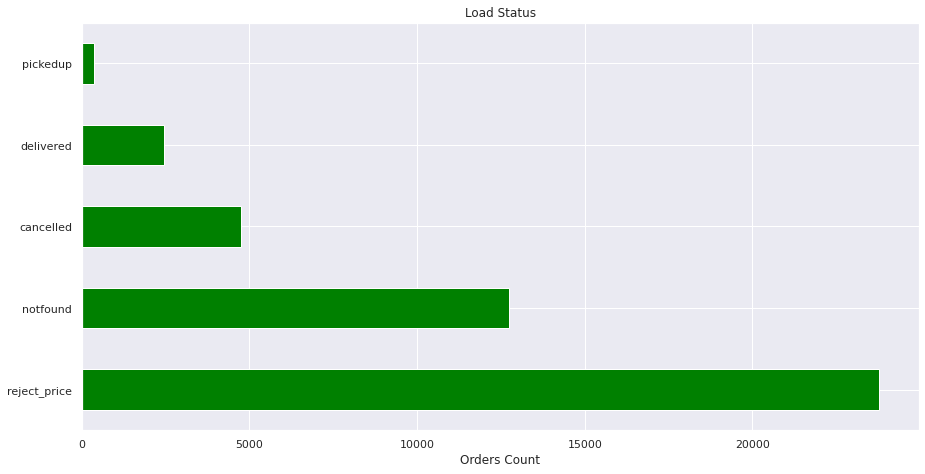

In [ ]:
orders_data['Load Status'].value_counts()[:].plot.barh(figsize=(15,7.5), title='Load Status', color='green')
plt.xlabel('Orders Count')
plt.show()

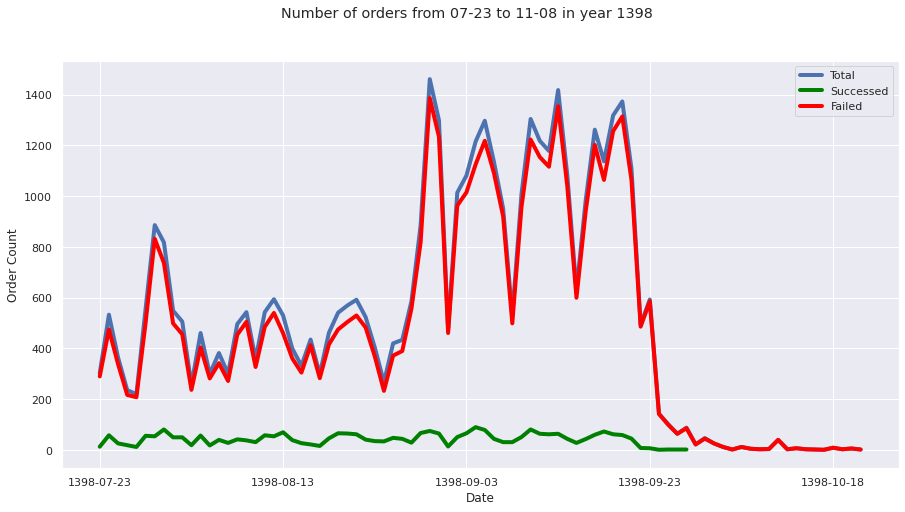

In [ ]:
ax = orders_data['Dispatch Date'].value_counts().sort_index(ascending=True).plot.line(x='index', y='Dispatch Date', figsize=(15,7.5),lw=4)
orders_data[(orders_data['Load Status'].isin(['delivered', 'pickedup']))]['Dispatch Date'].value_counts().sort_index(ascending=True).plot.line(x='index', y='Dispatch Date', figsize=(15,7.5),lw=4, ax=ax,color='green')
orders_data[(orders_data['Load Status'].isin(['cancelled', 'notfound', 'reject_price']))]['Dispatch Date'].value_counts().sort_index(ascending=True).plot.line(x='index', y='Dispatch Date', figsize=(15,7.5),lw=4, ax=ax,color='red')
plt.suptitle('Number of orders from 07-23 to 11-08 in year 1398')
plt.legend(['Total', 'Successed', 'Failed'])
plt.ylabel('Order Count')
plt.xlabel('Date')
plt.show()

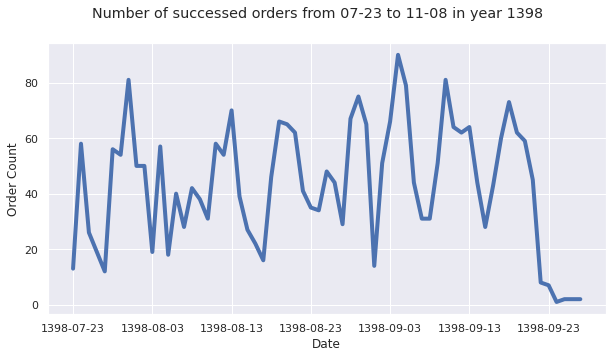

In [ ]:

orders_data[(orders_data['Load Status'].isin(['delivered', 'pickedup']))]['Dispatch Date'].value_counts().sort_index(ascending=True).plot.line(x='index', y='Dispatch Date', figsize=(10,5),lw=4)
plt.suptitle('Number of successed orders from 07-23 to 11-08 in year 1398')
plt.ylabel('Order Count')
plt.xlabel('Date')
plt.show()

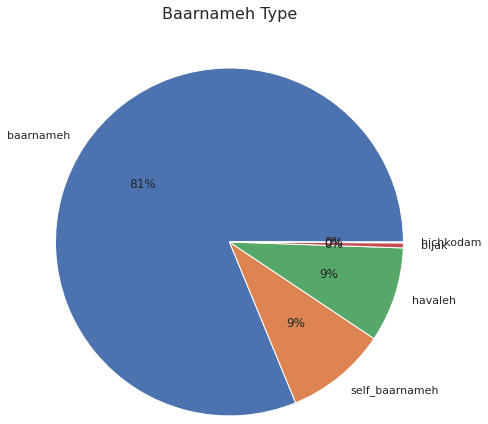

In [ ]:
orders_data['Baarnameh Type'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Baarnameh Type', y=1.5,fontsize=16)
plt.show()

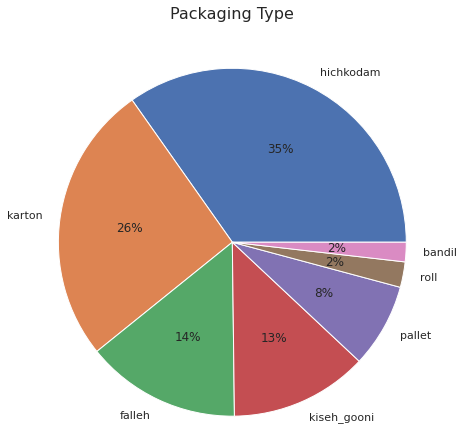

In [ ]:
orders_data['Packaging Type'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Packaging Type', y=1.5,fontsize=16)
plt.show()

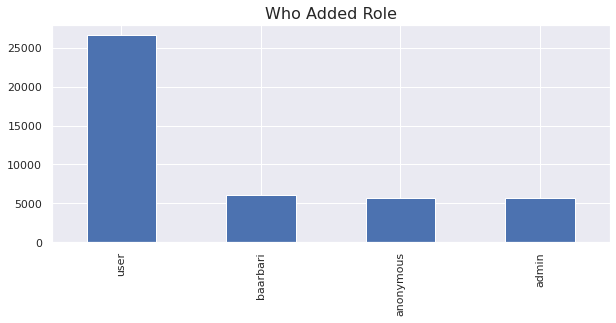

In [ ]:
orders_data['Who Added Role'].value_counts().plot.bar(figsize=(10,4), title='Who Added Role')
plt.title('Who Added Role',fontsize=16)
plt.show()

## Data Prepreocessing

 At the last step we will do some feature engineering and normalization and finally seprate the training and testing datasets


### Feature Engineering

In [ ]:
orders_data['Order Channel'] = orders_data['Order Channel'].fillna('Unknown')
orders_data['Baarnameh Type'] = orders_data['Baarnameh Type'].fillna('Unknown')
# orders_data['Unload Option'] = orders_data['Unload Option'].fillna('Unknown')
orders_data['Pickup Date Time Delta'] = orders_data['Pickup Date Time Delta'].fillna(0)

In [ ]:
orders_data['vehicle_typ_enc'] = orders_data['Vehicle Type'].astype('category').cat.codes
orders_data['baarnameh_typ_enc'] = orders_data['Baarnameh Type'].astype('category').cat.codes
orders_data['order_channel_enc'] = orders_data['Order Channel'].astype('category').cat.codes


orders_data.loc[0:200, ['Vehicle Type', 'vehicle_typ_enc', 'baarnameh_typ_enc', 'Baarnameh Type', 'order_channel_enc', 'Order Channel']]

,Vehicle Type,vehicle_typ_enc,baarnameh_typ_enc,Baarnameh Type,order_channel_enc,Order Channel
0,treili,4,0,Unknown,0,Unknown
1,khavar,1,0,Unknown,0,Unknown
2,nissan,2,0,Unknown,0,Unknown
3,joft,0,0,Unknown,0,Unknown
4,khavar,1,5,self_baarnameh,3,web
...,...,...,...,...,...,...
196,khavar,1,1,baarnameh,1,android
197,khavar,1,0,Unknown,0,Unknown
198,khavar,1,1,baarnameh,1,android
199,khavar,1,1,baarnameh,3,web


### Data Cleaning
First of all we need to do some data cleaning.

In [ ]:
orders_data.select_dtypes(include = "object").columns

Index(['Load Type', 'Source City', 'Destination City', 'Source State',
       'Destination State', 'Source Region', 'Destination Region',
       'Who Added Role', 'Vehicle Type', 'Vehicle Options', 'Baarnameh Type',
       'Dispatch Date', 'Dipatch Time', 'Order Channel', 'Packaging Type',
       'Creation Datetime', 'Unload Option', 'Load Status'],
      dtype='object')

In [ ]:
df_orig = copy.deepcopy(orders_data)
to_drop_columns = ['Vehicle Options','Source City', 'Destination City', 'Source State', 'Destination State', 'Source Region', 'Destination Region']
orders_data.drop(to_drop_columns, axis=1, inplace=True)

Now let's see what other columns we have with non-numeric values

In [ ]:
for col_name in list(orders_data.select_dtypes(include = "object").columns):
  print('Number of unique values in column %s is %d\n' %(col_name,len(orders_data[col_name].unique())))

Number of unique values in column Load Type is 1194

Number of unique values in column Who Added Role is 4

Number of unique values in column Vehicle Type is 5

Number of unique values in column Baarnameh Type is 6

Number of unique values in column Dispatch Date is 84

Number of unique values in column Dipatch Time is 1098

Number of unique values in column Order Channel is 4

Number of unique values in column Packaging Type is 7

Number of unique values in column Creation Datetime is 26863

Number of unique values in column Unload Option is 3

Number of unique values in column Load Status is 5



We can convert some of these columns to a numerical ones.

In [ ]:
#@title Reformat Date and Time Columns Utilities
def reformat_date(date):
  return date.replace("-", '')

def reformat_time(time):
  time = time.replace(":", '')
  return time[:-2]

def reformat_datetime(datetime):
  return datetime[:datetime.find('.')]

def extract_date(datetime):
  return datetime[:datetime.find(' ')]

def extract_time(datetime):
  return datetime[datetime.find(' '):]

def extract_day(date):
  return int(date[-2:])

def extract_month(date):
  return int(date[-4:-2])

def extract_year(date):
  return int(date[:4])

def extract_hour(time):
  return int(time[:-2])

def extract_mins(time):
  return int(time[-2:])

Now we will reformat date and time columns and convert them to numerical columns. And finally we drop unnecessary columns. As all the data in the same year we will not create column for dispatch and creation year

In [ ]:
orders_data['Dispatch Date'] = orders_data['Dispatch Date'].apply(reformat_date)
orders_data['Dipatch Time'] = orders_data['Dipatch Time'].apply(reformat_time)

orders_data['Creation Datetime'] = orders_data['Creation Datetime'].apply(reformat_datetime)

orders_data['Creation Date'] = orders_data['Creation Datetime'].apply(extract_date)
orders_data['Creation Time'] = orders_data['Creation Datetime'].apply(extract_time)
orders_data['Creation Date'] = orders_data['Creation Date'].apply(reformat_date)
orders_data['Creation Time'] = orders_data['Creation Time'].apply(reformat_time)

orders_data['Dispatch Month'] = orders_data['Dispatch Date'].apply(extract_month)
orders_data['Dispatch Day'] = orders_data['Dispatch Date'].apply(extract_day)
orders_data['Creation Month'] = orders_data['Creation Date'].apply(extract_month)
orders_data['Creation Day'] = orders_data['Creation Date'].apply(extract_day)

orders_data['Dispatch Hour'] = orders_data['Dipatch Time'].apply(extract_hour)
orders_data['Dispatch Minuts'] = orders_data['Dipatch Time'].apply(extract_mins)
orders_data['Creation Hour'] = orders_data['Creation Time'].apply(extract_hour)
orders_data['Creation Minuts'] = orders_data['Creation Time'].apply(extract_mins)

to_drop_columns = ['Dispatch Date','Dipatch Time', 'Creation Datetime', 'Creation Date', 'Creation Time']
orders_data.drop(to_drop_columns, axis=1, inplace=True)

We have more than 1000 types of Load Type in our dataset. So we need to set a threshold to reduce this diversity

In [ ]:
#@title Load Type Frequency Threshold

frequency_threshold = 10 #@param {type:"integer"}

orig_orders_data = copy.deepcopy(orders_data)

freq = orders_data['Load Type'].value_counts()
idx = freq.values
print("Number of unique Load Type values: ",len(freq[freq.values > frequency_threshold]))
print("From raw dataset {0:.2f} will remains after using the above threshold".format(
    (freq[freq.values > frequency_threshold].sum())/orders_data.shape[0]*100)
  )
freq_ser = freq[freq.values > frequency_threshold]
orders_data = orders_data[orders_data['Load Type'].isin(freq_ser.index)]


Number of unique Load Type values:  208
From raw dataset 93.56 will remains after using the above threshold


In [ ]:
for col_name in list(orders_data.select_dtypes(include = "object").columns):
  print('Number of unique values in column %s is %d\n' %(col_name,len(orders_data[col_name].unique())))

Number of unique values in column Load Type is 208

Number of unique values in column Who Added Role is 4

Number of unique values in column Vehicle Type is 5

Number of unique values in column Baarnameh Type is 6

Number of unique values in column Order Channel is 4

Number of unique values in column Packaging Type is 7

Number of unique values in column Unload Option is 3

Number of unique values in column Load Status is 5



Given that the range of unique values for each column is not that large, let's use one-hot encoding.

In [ ]:
orders_data = orders_data[(orders_data['Load Status'].isin(['delivered', 'pickedup']))]
#First, let's separate the target column, price
y = orders_data.pop('Packaging Type')

In [ ]:
to_drop_columns = orders_data.select_dtypes(include = "object").columns
orders_data.drop(to_drop_columns, axis=1, inplace=True)

### Data Normalization



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standard_scaling_columns = ['Driver Income', 'Weight', 'Distance', 'Duration', 'Transport Cost', 'Source Lat', 'Source Lng', 'Destination Lat', 'Destination Lng']
orders_data[standard_scaling_columns] = scaler.fit_transform(orders_data[standard_scaling_columns])
orders_data[standard_scaling_columns].describe()

,Driver Income,Weight,Distance,Duration,Transport Cost,Source Lat,Source Lng,Destination Lat,Destination Lng
count,2.562000e+03,2.562000e+03,2.562000e+03,2.562000e+03,2.562000e+03,2.562000e+03,2.562000e+03,2.562000e+03,2.562000e+03
mean,-1.941374e-17,-4.298756e-17,4.437425e-17,-8.320173e-17,-2.773391e-18,-4.375024e-15,-4.861754e-15,6.926544e-16,-4.412465e-15
std,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00,1.000195e+00
min,-9.165993e-01,-7.664315e-01,-7.135835e-01,-8.230528e-01,-9.166124e-01,-8.183200e+00,-1.650846e+01,-4.932054e+00,-2.741199e+00
25%,-5.712024e-01,-4.135564e-01,-6.242074e-01,-6.114955e-01,-5.712185e-01,1.417168e-01,-8.871019e-02,1.517269e-02,-4.955656e-02
50%,-4.498467e-01,-4.135564e-01,-5.619496e-01,-5.814280e-01,-4.498639e-01,1.417168e-01,-1.314478e-02,3.547712e-01,2.545196e-02
75%,2.036069e-01,-4.210898e-02,4.036522e-01,4.949957e-01,2.035840e-01,2.317025e-01,1.741040e-01,3.547712e-01,2.545196e-02
max,6.028679e+00,8.129735e+00,4.770752e+00,4.491065e+00,6.028605e+00,5.245140e+00,7.234980e+00,1.824137e+00,7.948289e+00


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test,y_train,y_test=train_test_split(orders_data,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(1793, 23)
(769, 23)


## Classification
Now it is time to test classification algorithms in action, starting from linear classifiers.

### SVM Classification


In [ ]:
from sklearn.svm import SVC
model = SVC(C=2,kernel='linear',decision_function_shape = "ovr",max_iter=20000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=2, kernel='linear', max_iter=20000)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.38


Let's also try SVM with nonlinear kernels

In [ ]:
model = SVC(C=2,kernel='rbf',decision_function_shape = "ovr",max_iter=20000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

# Predict the results
predictions = model.predict(X_test)

# Evaluate the score
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.25


A Confusion matrix could help us see which classes are being misclassified most:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


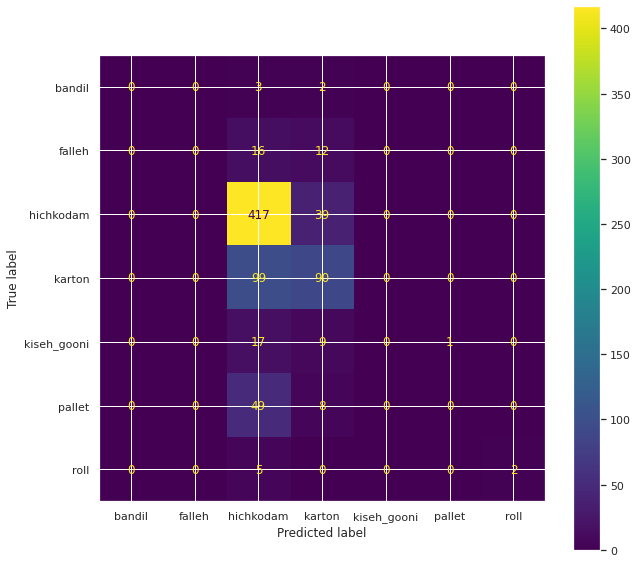

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test,ax=ax)
plt.show()

### Logistic Regression

In this section we will use logistic regression by OVR and Multinomail approaches. Also we calculate log loss for each of the outputs

In [ ]:
# Diable warnings about max_itr not reached etc.!
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

First of all we will use OVR technique to classfy packaging type with logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none',max_iter=400,multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='ovr', penalty='none')

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.45


In [ ]:
from sklearn.metrics import log_loss

print('Log loss of the output is %.2f' %log_loss(y_test, predictions))

Now we will use multinomail approach

In [ ]:
model = LogisticRegression(penalty='none',max_iter=400,multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='multinomial', penalty='none')

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.44


In [ ]:
print('Log loss of the output is %.2f' %log_loss(y_test, predictions))

### KNN

In this section we try to classify packaging type and tune it for the best number of neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6,weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score on Training set is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score on Training set is 0.72


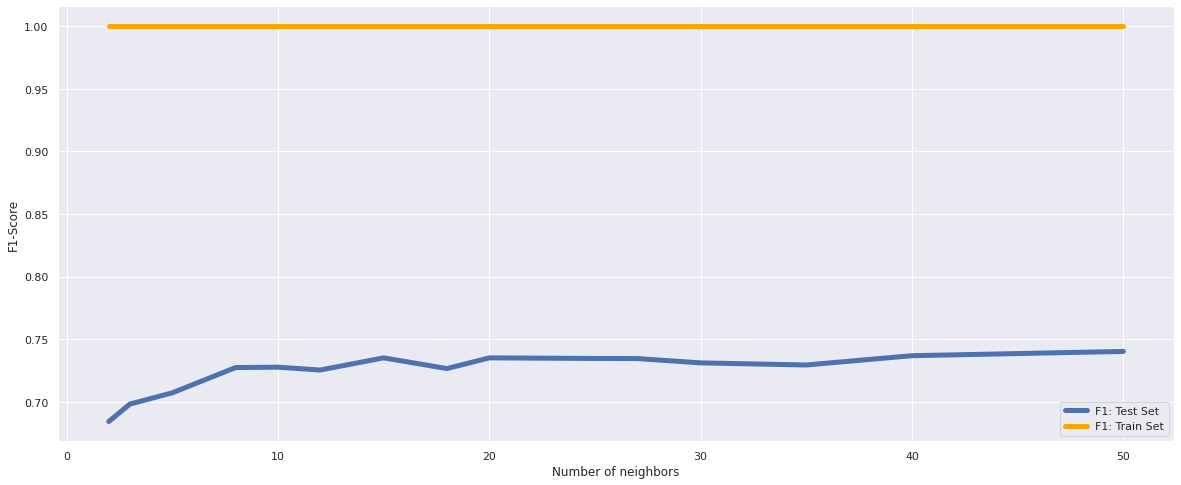

In [ ]:
scores = []
neighbors_list = [2,3,5,8,10,12,15,18,20,25,27,30,35,40,50]
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n,weights='distance')
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=5)
plt.plot(neighbors_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


The best value for number of neighbors is **18**

### Decision Tree
In this section we will use decision trees to classify packaging types

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.65


### Boosting
By boosting algorithms we will try to predict the packageing type of each order. So we will try three different boosting approaches. First of all we will try XGBoosting and then use LightGBM and Catboost approaches

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50)
model.fit(X_train, y_train,eval_metric=f1_score)

XGBClassifier(n_estimators=50, objective='multi:softprob')

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.65


Now we use LightGBM Boosting algorithm

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10)
model.fit(X_train,y_train,eval_metric=f1_score) #'logloss')

LGBMClassifier(learning_rate=0.09, max_depth=10)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.74


And finally we try Catboost algorithm

In [ ]:
#@title Install CatBoost
!pip install catboost
clear_output()
print("Done!")

Done!


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                          learning_rate=.3,
                          depth=5,
                          verbose=False,
                          )
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.74


## Bonus

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

! kaggle datasets download -d sujaypandit/fifa19-player-and-league-dataset

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 120MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  fifa19-player-and-league-dataset.zip
replace Fifa19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Fifa19.csv              


In [ ]:
df = pd.read_csv('Fifa19.csv')
print(df.shape)

(16344, 89)


It seems we have too many positions! We can combine some of them together to simplify the problem:

In [ ]:
# We go for a 4-3-3 formation!
df.loc[df['Position']=='ST','Position']='CF'              # All strickers are now counte as Central Forward (CF)
df.loc[df['Position']=='RS','Position']='RF'              # All right strikers are counted as Right Forward (RF)
df.loc[df['Position']=='LS','Position']='LF'              # All left strikers are counted as Left Forward (RF)

# Midfield
df.loc[df['Position'].isin(['RCM','RAM','RDM']),'Position']='RM'      # All variants right Middfieldsers (i.e. attacking and defending) are now counted as right middfielders
df.loc[df['Position'].isin(['LCM','LAM','LDM']),'Position']='LM'      # All variants left Middfieldsers (i.e. attacking and defending) are now counted as left middfielders
df.loc[df['Position'].isin(['CAM','CDM']),'Position']='CM'              # All central midfielders grouped together

# Defense
df.loc[df['Position'].isin(['RW','RWB']),'Position']='RB'      # All variants right defenders (i.e. wing and wing back) are now counted as right defenders
df.loc[df['Position'].isin(['LW','LWB','CB']),'Position']='LB'      # All variants Left defenders (i.e. wing and wing back) are now counted as left defenders

Data cleaning

In [ ]:
for col_name in list(df.columns):
  no_null_values = sum(df[col_name].isnull())
  if no_null_values:
    print('Number of null values in column %s is %d' %(col_name,no_null_values))

Number of null values in column Preferred Foot is 40
Number of null values in column International Reputation is 40
Number of null values in column Weak Foot is 40
Number of null values in column Skill Moves is 40
Number of null values in column Work Rate is 40
Number of null values in column Body Type is 40
Number of null values in column Real Face is 40
Number of null values in column Position is 40
Number of null values in column Jersey Number is 40
Number of null values in column Joined is 1174
Number of null values in column Loaned From is 15210
Number of null values in column Contract Valid Until is 40
Number of null values in column Height is 40
Number of null values in column Weight is 40
Number of null values in column LS is 1859
Number of null values in column ST is 1859
Number of null values in column RS is 1859
Number of null values in column LW is 1859
Number of null values in column LF is 1859
Number of null values in column CF is 1859
Number of null values in column RF i

In [ ]:
df['Joined'].value_counts()

Jul 1, 2018     1465
Jul 1, 2017     1086
Jul 1, 2016      578
Jan 1, 2018      509
Jul 1, 2015      345
                ... 
May 21, 2017       1
Mar 16, 2016       1
Mar 19, 2016       1
Jun 12, 2014       1
Oct 31, 2015       1
Name: Joined, Length: 1688, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
skills_columns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
                  'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB',
                  'LB','LCB','CB','RCB','RB']
for col_name in skills_columns:
  df[col_name] = df[col_name].str.split('+').str[0]
  df[col_name] = df[col_name].astype(int)

In [ ]:
def convert_currency_to_number(x):
      output = x.replace('€','')
      if 'M' in x:
        output = output.replace('M','')
        output = float(output) * 1e6
      elif 'K' in x:
        output = output.replace('K','')
        output = float(output) * 1e3
      output = float(output)
      return output

In [ ]:
df['Value'] = df['Value'].apply(convert_currency_to_number)
df['Wage'] = df['Wage'].apply(convert_currency_to_number)
df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)

In [ ]:
def convert_height_to_number(x):
    output = x.replace("'",'.')
    return float(output)* 30.48

def convert_weight_to_number(x):
    output = x.replace("lbs",'')
    return float(output)* .4205

In [ ]:
df['Height'] = df['Height'].apply(convert_height_to_number)
df['Weight'] = df['Weight'].apply(convert_weight_to_number)

In [ ]:
for col_name in list(df.select_dtypes(include = "object").columns):
  print('Number of unique values in column %s is %d\n' %(col_name,len(df[col_name].unique())))

Number of unique values in column Club is 0

Number of unique values in column Playing_in_League is 0

Number of unique values in column Name is 0

Number of unique values in column Photo is 0

Number of unique values in column Nationality is 0

Number of unique values in column Flag is 0

Number of unique values in column Club Logo is 0

Number of unique values in column Value is 0

Number of unique values in column Wage is 0

Number of unique values in column Preferred Foot is 0

Number of unique values in column Work Rate is 0

Number of unique values in column Body Type is 0

Number of unique values in column Real Face is 0

Number of unique values in column Position is 0

Number of unique values in column Joined is 0

Number of unique values in column Loaned From is 0

Number of unique values in column Contract Valid Until is 0

Number of unique values in column Height is 0

Number of unique values in column Weight is 0

Number of unique values in column Release Clause is 0



In [ ]:
target_positions = df.pop('Position')
to_one_hot_columns = list(df.select_dtypes(include = "object").columns)
onehot_column_names = []
for column in to_one_hot_columns:
    encoded_df = pd.get_dummies(df[column])
    df[encoded_df.columns] = encoded_df     # Insert the newly encoded columns into the dataset
    onehot_column_names += list(encoded_df.columns)
df.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [ ]:
df.drop(to_one_hot_columns, axis=1, inplace=True)

Prepare train and test sets

In [ ]:
# First, let's separate the target column, price
y = target_positions

Using LightGBM

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10)
model.fit(X_train,y_train,eval_metric=f1_score) #'logloss')

LGBMClassifier(learning_rate=0.09, max_depth=10)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.74
